In [39]:
!pip install networkx matplotlib pandas numpy

Defaulting to user installation because normal site-packages is not writeable


Degree Centrality – Identifies the most connected books. <br/>
Betweenness Centrality – Finds books that act as bridges between communities. <br/>
Eigenvector Centrality – Determines books that are influential based on their connections.<br/>
Modularity – Measures the strength and structure of ideological communities. <br/>

In [59]:
import pandas as pd
import networkx as nx
from networkx.algorithms import community

# Load the data
nodes_df = pd.read_csv("./data/nodes.csv")
edges_df = pd.read_csv("./data/edges.csv")

# Clean column names (if necessary)
nodes_df.columns = nodes_df.columns.str.strip()
edges_df.columns = edges_df.columns.str.strip()

# Rename columns for consistency
nodes_df.rename(columns={"# index": "index"}, inplace=True)
edges_df.rename(columns={"# source": "source"}, inplace=True)

# Create a Graph
G_new = nx.Graph()

# Add nodes with attributes
for _, row in nodes_df.iterrows():
    G_new.add_node(row["index"], label=row["label"], value=row["value"])

# Add edges
for _, row in edges_df.iterrows():
    G_new.add_edge(row["source"], row["target"])

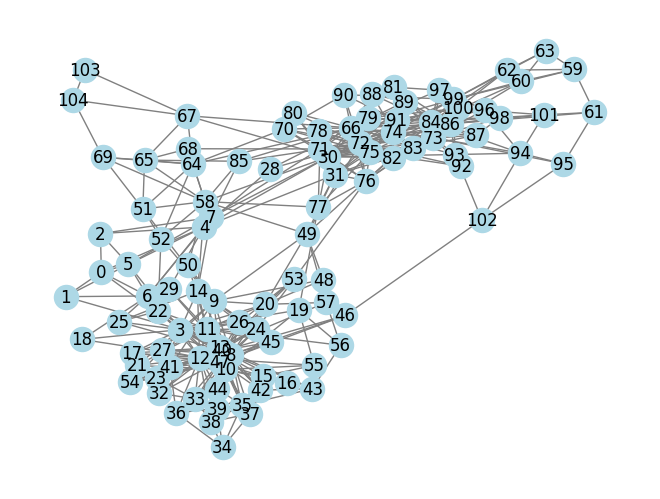

In [61]:
nx.draw(G_new, with_labels=True, node_color="lightblue", edge_color="gray")
plt.show()

In [60]:
# Compute Degree Centrality
degree_centrality = nx.degree_centrality(G_new)

# Compute Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G_new)

# Compute Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G_new, max_iter=1000)

# Compute Modularity using Girvan-Newman method (community detection)
communities_generator = community.girvan_newman(G_new)
first_partition = next(communities_generator)  # First level of community division
modularity_communities = [list(community) for community in first_partition]

# Convert centrality measures to DataFrame for better visualization
centrality_df = pd.DataFrame({
    "Node": list(degree_centrality.keys()),
    "Degree Centrality": list(degree_centrality.values()),
    "Betweenness Centrality": list(betweenness_centrality.values()),
    "Eigenvector Centrality": list(eigenvector_centrality.values())
})

# Merge with book labels for interpretability
centrality_df = centrality_df.merge(nodes_df, left_on="Node", right_on="index", how="left")[["label", "Degree Centrality", "Betweenness Centrality", "Eigenvector Centrality"]]

# Display the top 10 most important books based on each centrality measure
top_books = centrality_df.sort_values(by=["Degree Centrality"], ascending=False).head(10)

# Display modularity results (number of detected communities)
num_communities = len(modularity_communities)

print("Number of Detected Communities:", num_communities)
print("\nTop 10 Books by Centrality:\n", top_books)


Number of Detected Communities: 2

Top 10 Books by Centrality:
                        label  Degree Centrality  Betweenness Centrality  \
8   A National Party No More           0.240385                0.074908   
12      Off with Their Heads           0.240385                0.095262   
3           Losing Bin Laden           0.221154                0.076093   
84               Bushwhacked           0.221154                0.057900   
72          American Dynasty           0.211538                0.090934   
66      The Great Unraveling           0.201923                0.065214   
73                  Big Lies           0.201923                0.043198   
30      The Price of Loyalty           0.192308                0.139478   
11                    Legacy           0.173077                0.029283   
47                 Arrogance           0.173077                0.027731   

    Eigenvector Centrality  
8                 0.090929  
12                0.086789  
3                 0.077

In [62]:
!pip install python-louvain

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9407 sha256=c2815a94c117837eda9db4231e12cef2a8623f49b3d13008724143668cd7f9bd
  Stored in directory: /Users/fatemehizadinejad/Library/Caches/pip/wheels/4d/7c/b6/79b198e4ec43f915fbdf967953d48b89a18893b12aa9df0ae2
Successfully built python-louvain


In [63]:
import community  # python-louvain package
import networkx as nx

# Compute Louvain communities
partition = community.best_partition(G_new)

# Compute modularity score
modularity_score = community.modularity(partition, G_new)

print("Modularity Score:", modularity_score)

Modularity Score: 0.5269666445565376
